# MNIST image recognition (Deep Neural Networks) using keras:

The MNIST dataset is a multiclass dataset which consists of 10 classes containing numbers from 0 to 9. The main difference between the previous datasets and the MNIST dataset that we are going to use is the method in which the data is inputted to the neural .
For the MNIST dataset a single data point comes in the form of an image. A single image in the MNIST dataset consists of 28\*28 pixels. This implies that a single image would consist of 786 pixels in total. Thus the neural network should contain 786 inputs. This makes our dataset more complex than any of the datasets that we have worked with till now. 

In this section, we will mainly focus on optimizing the neural network. We will address mainly two problems: underfitting and overfitting. 

Large datasets can be split into a training dataset and a test dataset. The training dataset contains each input corresponding to some answer. The neural network trains over this data and updates the weights and biases. Initially, we start with some random model which runs on the training dataset and produces some results. Clearly in the first go the results won't be accurate. Based on the  result of the comparison we minimise the error, the cross-entropy value by updating the parameters of the network in the direction opposite to the gradient. By minimizing the error we can classify more and more data correctly.

Now, once the neural network model is trained properly, what would happen if we feed an image to the network from the test set that the model hasn't seen before. We use the training dataset to train the model unless the error is completely minimised. That way the netwrok will be able to classify newly inputted data better. The ability to correctly classify newly inputted data which don't have a label is known as Generalization.

Now alongwith minimising the training error we also want the test error to be low. The problem with a training classifier is that they tend to memorize the training set and they do it considerably well. So instead of looking at patterns among the data the network will memorize the labels. By doing so the network will fail to generalise to new examples. Therefore, while training the network we then sample the images from test set and we expect that the train error will be less than test error at each epoch. <b>Thus at some point the more we minimize the training error the bigger will be the test error</b>.

Hence, we would expect the training error to be small but we also want the gap between the trainig error and the test error to be small as well, i.e., we want our training model to effectively generalise our test data.

1. Small training error:
This factor corresponds to a challenge known as underfitting.
Underfitting occurs when the model hasn't been supplied with enough capacity to capture data's underlying trend. Thus it is not able to fit the training set. For example, as we know that image recognition is a complex task and requires deep neural networks. If we use a single linear perceptron to classify the images it would result in an underfitted model as it lacks the capacity to train itself.
Let us consider another case of regression model. If we use a linear model $\bar{y} = b + w\cdot{x}$  to capture the trend of an underlying parabolic dataset, it will simply underfit. However, if we will use $\bar{y} = b + w_1\cdot{x} + w_2\cdot{x^2}$ then this will capture the trend perfectly. 

2. Gap between training and test grows larger:
This factor corresponds to a challenge known as overfitting.
Now, if the capacity of the model is high then it suffers from the problem of overfitting. In the second example above if we use a polynomial of degree 9 then it will pass through each data point but won't capture the underlying trend in the data.
An indication of overfitting is when the model performs well on training data with low error but classifies the test data with a relatively substantial higher error.
Now, if the model is too overfitted it could be fixed based on the following approaches:<br>
    * Reduce depth and complexity.<br>
    * Reduce number of nodes in each layer.<br>
    * Reduce number of epochs.<br>
    * Using larger datasets can also help to reduce overfitting, as the network must now be flexible enough to account for       more data. It won't always work, but training with more data can improve accuracy, so long as the data is clean and       relevant, and not just noisy data.

Now, to wrap up, we have proposed that when the model is at insufficient capacity, i.e., the learning eqn is too simple to capture the underlying trend of the data, both the training and genralization errors are too high. As we increase the capacity of the model to properly fit the data the training error decreases and asymptotes to the minimum possible error. At this point we have reached the optimal zone where the function being used to train our data isn't as simple to underfit it but it is also not too complex so as to overfit the data. In this zone is the smallest gap between the training and the test error. From here on if we keep on increasing the complexity of the model then the training error keeps on decreasing as the model will now start memorizing specific features of the training data classifying them with maximum accuracy but it isn't able to generalize to newly inputted data, hence the test error is high. Eventually, the generalization gap becomes so large that the model is not able to classify the newly inputted data correctly even after low training error. Hence, we need to make regularization which reduces the generalization gap.

### Hyperparameters:
Hyperparameters are different from other parameters like weights and biases. The weights and biases are adapted by the learning algorithm itself, whereas hyperparameters are not. Hyperparameters are used to control the behavior of the learning algorithm. By tuning the hyperparameters we are able to tune the capacity of the model. Examples include the learning rate, the number of nodes per layer, the number of hidden layers, the depth of the neural network and so on. The deeper the neural network the higher the capacity to learn.To address overfitting we can simply tune the hyperparameters.

Tuning hyperparameters is exactly why we make use of a <b>validation set</b>. A validation set according to the definition is a set of data points which we use to fine tune the hyperparameters. By doing so we are able to fine tune the complexity of our model providing it with just enough capacity to capture the underlying trend to generalize the newly inputted data.
What happens first is that we use the training set for the model to learn the weights and biases. Then we use the validation set to fine tune the hyperparameters.

There is a very good reason why we don't use the training data to fine tune the hyperparameters. The reason is that during the training stage the goal is to minimize the training error. So naturally fine tuning the hyperparameters during the training stage based on the training set will aim to maximize the model capacity. That way our model can fit the training data to maximum accuaracy, eventually reaching a high enough capacity that results in overfitting.

How we go about this is we split the training data into a training set and a validation set. The validation set is used to estimate the generalization error during or after training by updating the hyperparameters accordingly. Here, one should know that the training set will be roughly 3 or 4 times larger than the validation set.

What is going to happen is that based on the trained model the model is going to classify a new subset of images that the model has never seen before, the validation set. What it does is that it evaluates the performance of our model for different combination of hyperparameter values. And we retain the values for the model with the least validation error. Since the first model is naturally trained to memorize the specific features of the training set, but we also fine tune the model to generalize it over images that it has never seen before. But we need to note that our classifier has seen our validation set indirectly every time it makes a decision on which classifier to use based on which hyperparameter to tune. Thus information about the validation set bleeds through the training set. Hence, we do a final evaluation of the model using the test set.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [19]:
np.random.seed(0)

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
#we have 60,000 samples and each image is 28 pixels in height and 28 pixels wide
print(X_train.shape)
#similarly we have 10,000 samples in the test set
print(X_test.shape)

print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [22]:
#verifying the conditions that our data should meet
assert(X_train.shape[0] == y_train.shape[0]), "Testing if the number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "Testing if the number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28, 28)), "Tesitng if the dimensions of the images are not 28*28"
assert(X_test.shape[1:] == (28, 28)), "Testing if the dimensions of the images are not 28*28"

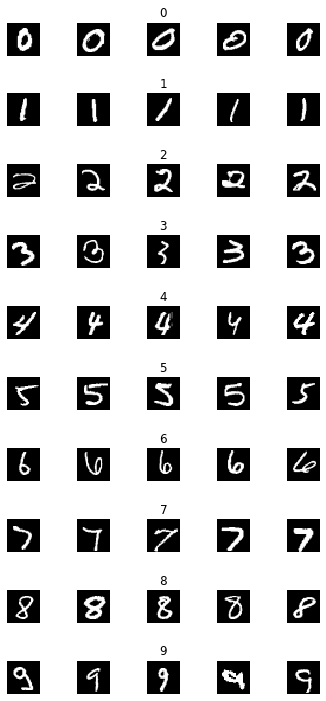

In [23]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        #if we don't specify cmap then it would result in a colorful representation
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            #we will record the number of images for each category
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

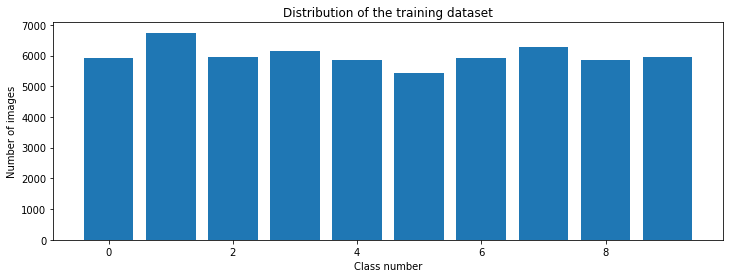

In [24]:
#summarizing and visualizing the numbers behind our data
print(num_of_samples)
plt.figure(figsize = (12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

Data Preparation:

In [25]:
#one-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [26]:
#normalizing the data
X_train = X_train/255
X_test = X_test/255

Our training data contains 60,000 grayscale images. Each image contains pixel intensities from 0 to 255. We choose to
divide by 255 because we want the intensity values between 0 to 1. This decreases the variance in the data.
Due to the nature of the mathematical operations in the neural network we need to insure that the data has low variane.
This helps the neural network to learn better.

Now, due to the structure of our neural network the input layer will be multiplied by the weight matrix to form the input
for the first hidden layer. To conduct matrix multiplication we must make our images one-dimensional.
That is instead of the images being 28 rows and 28 columns we must flatten the images into an array of 784 elements.

In [27]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Implementation code:

In [28]:
#we will have 784 input nodes and 10 output nodes in the network
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    #defining the final output layer
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [29]:
model = create_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


Now, notice how there are 7850 parameters in the first layer. Now, if the images were to be RGB, then there would be 3 
channels corresponding to each pixel and this would result in a flattened array of 15,552 values. Now each node in the 
hidden layer would have 15,552 inputs and would make it computationally harder to handle. Thus, we use convolutional 
neural networks in such cases which make the calculation more effective.

In [30]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 10us/step - loss: 0.5083 - accuracy: 0.8430 - val_loss: 0.2539 - val_accuracy: 0.9275
Epoch 2/10
54000/54000 [==============================] - 0s 8us/step - loss: 0.2961 - accuracy: 0.9140 - val_loss: 0.2199 - val_accuracy: 0.9388
Epoch 3/10
54000/54000 [==============================] - 0s 8us/step - loss: 0.2678 - accuracy: 0.9240 - val_loss: 0.2146 - val_accuracy: 0.9367
Epoch 4/10
54000/54000 [==============================] - 0s 8us/step - loss: 0.2497 - accuracy: 0.9281 - val_loss: 0.2002 - val_accuracy: 0.9442
Epoch 5/10
54000/54000 [==============================] - 0s 7us/step - loss: 0.2382 - accuracy: 0.9328 - val_loss: 0.2040 - val_accuracy: 0.9397
Epoch 6/10
54000/54000 [==============================] - 0s 7us/step - loss: 0.2304 - accuracy: 0.9344 - val_loss: 0.2042 - val_accuracy: 0.9385
Epoch 7/10
54000/54000 [==============================] - 0s 7us/step - lo

Text(0.5, 0, 'epoch')

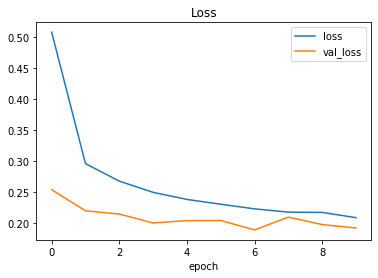

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

As we can see in the plot above the validation loss is lower than the training loss. There can be many reasons that can be 
attributed to this. For one, the validation loss is only calculated over the validation dataset while the training loss is 
calculated over the training dataset. The training set is 9 times larger as compared to  the validation set. 
However, what is important here is that the validation loss is approaching the training loss and this will continue to a 
point where the training loss will be less than the validation loss. That is where we begin to overfit the model. What that implies is that our model keeps memorizing the data and fails to generalize it for the new inputs.
We will test it with 30 epochs.

In [32]:
model_test = create_model()
history_test = model_test.fit(X_train, y_train, validation_split = 0.1, epochs = 30, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 1s 10us/step - loss: 0.5133 - accuracy: 0.8417 - val_loss: 0.2523 - val_accuracy: 0.9265
Epoch 2/30
54000/54000 [==============================] - 0s 7us/step - loss: 0.2928 - accuracy: 0.9154 - val_loss: 0.2371 - val_accuracy: 0.9335
Epoch 3/30
54000/54000 [==============================] - 0s 7us/step - loss: 0.2653 - accuracy: 0.9217 - val_loss: 0.2314 - val_accuracy: 0.9343
Epoch 4/30
54000/54000 [==============================] - 0s 7us/step - loss: 0.2442 - accuracy: 0.9281 - val_loss: 0.1934 - val_accuracy: 0.9452
Epoch 5/30
54000/54000 [==============================] - 0s 7us/step - loss: 0.2246 - accuracy: 0.9342 - val_loss: 0.2068 - val_accuracy: 0.9422
Epoch 6/30
54000/54000 [==============================] - 0s 7us/step - loss: 0.2208 - accuracy: 0.9343 - val_loss: 0.1852 - val_accuracy: 0.9487
Epoch 7/30
54000/54000 [==============================] - 0s 8us/step - lo

Text(0.5, 0, 'epoch')

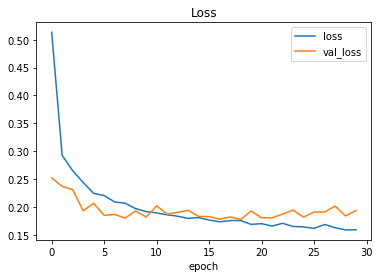

In [33]:
plt.plot(history_test.history['loss'])
plt.plot(history_test.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

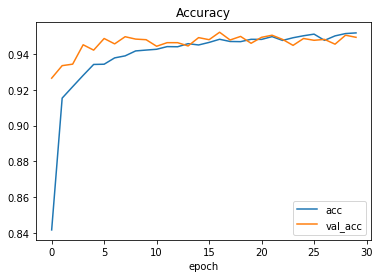

In [34]:
plt.plot(history_test.history['accuracy'])
plt.plot(history_test.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

If we increase the computational capacity of the model to a point where it starts memorizing the data rather than 
develop general patterns that it can then use on the test data. To demonstarte this we can increase the number of nodes.
We will increase the number of nodes to 784 in each layer.

In [39]:
def create_model_test():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(num_pixels, activation = 'relu'))
    #defining the final output layer
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [36]:
model_test2 = create_model_test()

In [37]:
history_test2 = model_test2.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.3335 - accuracy: 0.9129 - val_loss: 0.1233 - val_accuracy: 0.9622
Epoch 2/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.1282 - accuracy: 0.9626 - val_loss: 0.1316 - val_accuracy: 0.9605
Epoch 3/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.1066 - accuracy: 0.9687 - val_loss: 0.1060 - val_accuracy: 0.9722
Epoch 4/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.0915 - accuracy: 0.9729 - val_loss: 0.1078 - val_accuracy: 0.9692
Epoch 5/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.0855 - accuracy: 0.9746 - val_loss: 0.1122 - val_accuracy: 0.9713
Epoch 6/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.0748 - accuracy: 0.9788 - val_loss: 0.1202 - val_accuracy: 0.9713
Epoch 7/10
54000/54000 [==============================] - 3s 63us/ste

Text(0.5, 0, 'epoch')

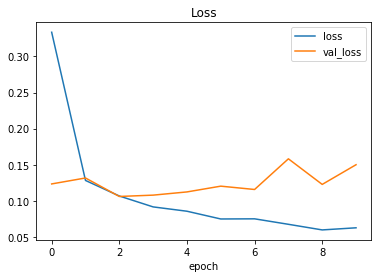

In [38]:
plt.plot(history_test2.history['loss'])
plt.plot(history_test2.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [42]:
#let's evaluate the model that we have created
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2282178461678326
Test accuracy: 0.9362999796867371


<Response [200]>


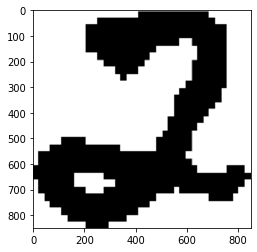

In [45]:
import requests
#PIL stands for python imaging library
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'

response = requests.get(url, stream = 1)
#response 200 implies a successful get request
print(response)

#we will use the zImage module to identify the raw content of the response
img = Image.open(response.raw)

plt.imshow(img)

Now the image should correspond to what the neural network was supposed to learn. We should trasform the image into a 28\*28
grayscale image. The above image is a 'png' file. We need to access it as a numpy array so that we can modify it.

In [46]:
img_array = np.asarray(img)
print(img_array.shape)

(850, 850, 4)


In [47]:
import cv2

resized = cv2.resize(img_array, (28, 28))
print(resized.shape)

(28, 28, 4)


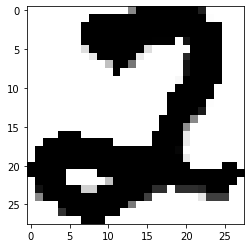

In [48]:
'''
Notice that the image has a depth of 4. These represent the red, green, blue and alpha channels.
'''
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_scale, cmap = plt.get_cmap("gray"))

Now there is still one problem. We have trained our neural network on images with balck background and white color representing
the digit.

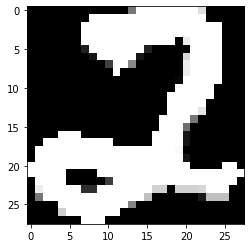

In [49]:
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [50]:
#similar to what we did with the images before we will normalize the images
image = image/255
image = image.reshape(1, 784)
print(image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.4627451  1.         1.         1.         1.
  1.         1.         1.         1.         0.87058824 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.00784314 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.         1.         1.
  1.         1.         1.         1.   

In [52]:
prediction = model.predict_classes(image)
print("predicted digit:", str(prediction))

predicted digit: [2]
